In [9]:
def coordinate_to_index(m,i,j):
    return (m*i)-i+j

In [8]:
coordinate_to_index(4,1,2)

5

In [4]:
import torch

In [58]:
m=100
coef=torch.zeros((m-1)**2,(m-1)**2)
const=torch.zeros((m-1)**2,1)

In [59]:
Tu=500
Td=100
Tl=100
Tr=100

In [60]:
for i in range(m-1):
    for j in range(m-1):

        row = coordinate_to_index(m, i, j)

        # center coefficient
        coef[row][row] = -4

        # UP neighbor
        if i > 0:
            coef[row][coordinate_to_index(m, i-1, j)] += 1
        else:
            const[row] -= Tu

        # DOWN neighbor
        if i < m-2:
            coef[row][coordinate_to_index(m, i+1, j)] += 1
        else:
            const[row] -= Td

        # LEFT neighbor
        if j > 0:
            coef[row][coordinate_to_index(m, i, j-1)] += 1
        else:
            const[row] -= Tl

        # RIGHT neighbor
        if j < m-2:
            coef[row][coordinate_to_index(m, i, j+1)] += 1
        else:
            const[row] -= Tr


In [61]:
coef_inv = torch.linalg.inv(coef)


In [62]:
Result_matrix_2=torch.matmul(coef_inv,const)

In [63]:
print(Result_matrix_2)

tensor([[299.9563],
        [378.9730],
        [416.1125],
        ...,
        [100.1310],
        [100.0874],
        [100.0437]])


In [64]:
Temp=torch.zeros((m-1,m-1))

In [65]:
for i in range(m-1):
  for j in range(m-1):
    Temp[i][j]=Result_matrix_2[coordinate_to_index(m,i,j)]

print(Temp)

tensor([[299.9563, 378.9730, 416.1125,  ..., 416.1125, 378.9731, 299.9563],
        [220.8512, 299.8246, 349.0515,  ..., 349.0515, 299.8245, 220.8512],
        [183.6244, 250.4229, 299.6057,  ..., 299.6056, 250.4229, 183.6244],
        ...,
        [100.1314, 100.2626, 100.3937,  ..., 100.3936, 100.2627, 100.1314],
        [100.0875, 100.1750, 100.2622,  ..., 100.2622, 100.1749, 100.0875],
        [100.0437, 100.0874, 100.1310,  ..., 100.1310, 100.0874, 100.0437]])


In [66]:
Tfull = torch.zeros((m+1, m+1))

# interior
Tfull[1:-1, 1:-1] = Temp

# boundaries
Tfull[0, :]  = Tu    # top
Tfull[-1, :] = Td     # bottom
Tfull[:, 0]  = Tl     # left
Tfull[:, -1] = Tr 

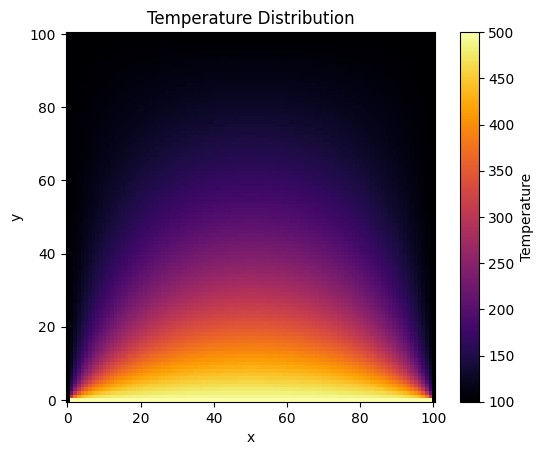

In [67]:
import matplotlib.pyplot as plt

plt.imshow(Tfull, cmap='inferno', origin='lower')
plt.colorbar(label='Temperature')
plt.title('Temperature Distribution')
plt.xlabel('x')
plt.ylabel('y')
plt.show()
